<a href="https://colab.research.google.com/github/Pawan2905/Jobathon_av_Jan/blob/main/customer_life_time_valueregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import model_selection
from sklearn import tree,ensemble
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold,train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/Pawan2905/Jobathon_av_Jan/main/train_BRCpofr.csv")
test = pd.read_csv('https://raw.githubusercontent.com/Pawan2905/Jobathon_av_Jan/main/test_koRSKBP.csv')

In [ ]:
print('Training data shape,',train.shape)
print('Testing data shape,',test.shape)

Training data shape, (89392, 12)
Testing data shape, (59595, 11)


In [ ]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [ ]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


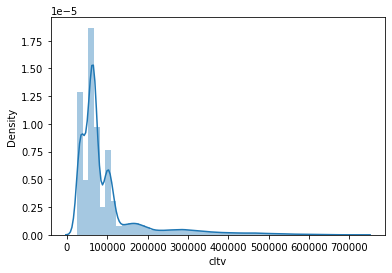

In [ ]:
sns.distplot(train['cltv'])
plt.show()
# It is skew towards right

In [ ]:
cat_col = ['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'num_policies', 'policy', 'type_of_policy']

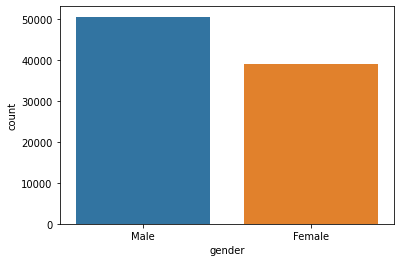

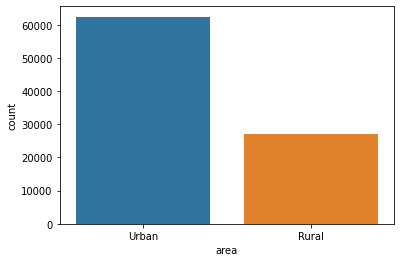

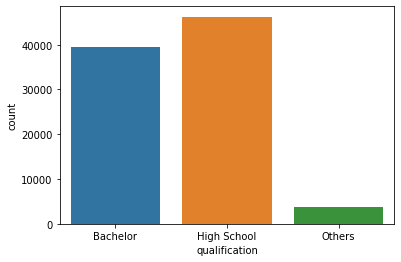

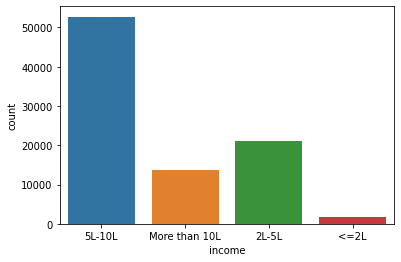

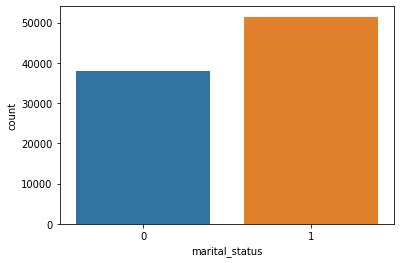

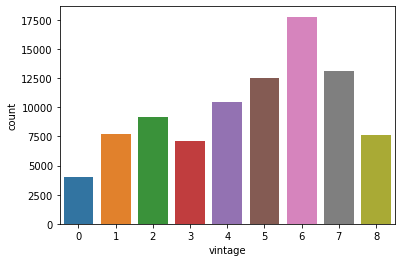

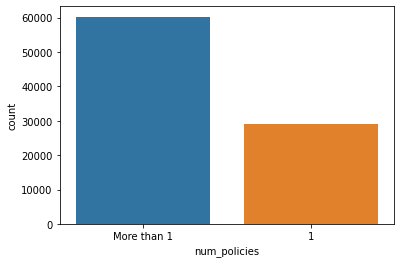

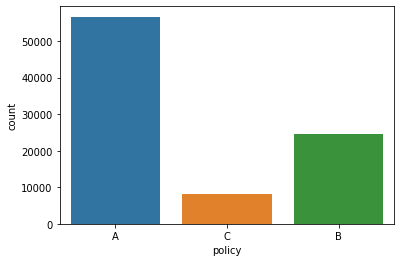

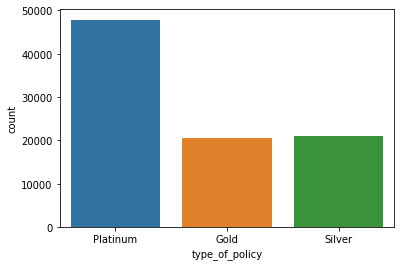

In [ ]:
for i in cat_col: 
    sns.countplot(x=train[i],data=train)
    plt.show()

In [ ]:
agg_df = pd.concat([train,test],axis=0)
agg_df.head()
# pd.get_dummies(train,columns=cat_col)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736.0


In [ ]:
dummy_agg_df = pd.get_dummies(agg_df,columns=cat_col)

In [ ]:
dummy_agg_df.columns

Index(['id', 'claim_amount', 'cltv', 'gender_Female', 'gender_Male',
       'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others', 'income_2L-5L',
       'income_5L-10L', 'income_<=2L', 'income_More than 10L',
       'marital_status_0', 'marital_status_1', 'vintage_0', 'vintage_1',
       'vintage_2', 'vintage_3', 'vintage_4', 'vintage_5', 'vintage_6',
       'vintage_7', 'vintage_8', 'num_policies_1', 'num_policies_More than 1',
       'policy_A', 'policy_B', 'policy_C', 'type_of_policy_Gold',
       'type_of_policy_Platinum', 'type_of_policy_Silver'],
      dtype='object')

In [ ]:
cat = ['id', 'claim_amount', 'cltv', 'gender_Female', 'gender_Male',
       'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others', 'income_2L_5L',
       'income_5L_10L', 'income_less_than_equalto_2L', 'income_More_than_10L',
       'marital_status_0', 'marital_status_1', 'vintage_0', 'vintage_1',
       'vintage_2', 'vintage_3', 'vintage_4', 'vintage_5', 'vintage_6',
       'vintage_7', 'vintage_8', 'num_policies_1', 'num_policies_More_than_1',
       'policy_A', 'policy_B', 'policy_C', 'type_of_policy_Gold',
       'type_of_policy_Platinum', 'type_of_policy_Silver']

In [ ]:
dummy_agg_df.columns = cat

In [ ]:
dummy_agg_df.head()

,id,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,...,vintage_7,vintage_8,num_policies_1,num_policies_More_than_1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,5790,64308.0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
1,2,5080,515400.0,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
2,3,2599,64212.0,0,1,0,1,1,0,0,...,0,1,0,1,1,0,0,0,1,0
3,4,0,97920.0,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,1,0
4,5,3508,59736.0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
train = dummy_agg_df[:train.shape[0]]
test = dummy_agg_df[train.shape[0]:]

In [ ]:
# we create a new column called kfold and fill it with -1
train["kfold"] = -1
# the next step is to randomize the rows of the data
train = train.sample(frac=1).reset_index(drop=True)
# fetch targets
y = train.cltv.values
# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=train, y=y)):
    train.loc[v_, 'kfold'] = f
# save the new csv with kfold column
train.to_csv("train_folds.csv", index=False)

<ipython-input-17-7d046a2e6610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["kfold"] = -1


In [ ]:
X_test = test.drop(columns=['cltv'],axis=1)

In [ ]:
X=train.drop(columns=['id','cltv'],axis=1)
y=train['cltv']
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.15) 


In [ ]:
X_valid=X_test
Y_valid=Y_test

In [ ]:
import math

In [ ]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from xgboost import XGBRegressor

# Choose hyperparameter domain to search over
space = {
        'max_depth':hp.choice('max_depth', np.arange(10, 25, 1, dtype=int)),
        'n_estimators':hp.choice('n_estimators', np.arange(1000, 10000, 10, dtype=int)),
        'colsample_bytree':hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight':hp.choice('min_child_weight', np.arange(250, 350, 10, dtype=int)),
        'subsample':hp.quniform('subsample', 0.7, 0.9, 0.1),
        'eta':hp.quniform('eta', 0.1, 0.3, 0.1),
        
        'objective':'reg:squarederror',
        
        'tree_method':'gpu_hist',
        'eval_metric': 'rmse',
    }

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
              verbose=False, early_stopping_rounds=10)
    Y_pred = model.predict(X_valid).clip(0, 20)
    score = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo=tpe.suggest, max_evals=1000)
    return best

trials = Trials()
best_params = optimize(trials, space)

# Return the best parameters
space_eval(space, best_params)

135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465619583
135097.74465

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'eval_metric': 'rmse',
 'max_depth': 18,
 'min_child_weight': 280,
 'n_estimators': 4790,
 'objective': 'reg:squarederror',
 'subsample': 0.9,
 'tree_method': 'gpu_hist'}

In [ ]:
final_test_preds = []
for fold in range(5):
    # read the training data with folds
    df = pd.read_csv("./train_folds.csv")
    # training data is where kfold is not equal to provided fold
    # also, note that we reset the index
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # validation data is where kfold is equal to provided fold
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # drop the label column from dataframe and convert it to
    # a numpy array by using .values.
    # target is label column in the dataframe
#     df_train = df_train[imp_cols]
#     df_valid = df_valid[imp_cols]
    
    x_train = df_train.drop(columns=["cltv","kfold"], axis=1).values
    y_train = df_train.cltv.values
    # similarly, for validation, we have
    x_valid = df_valid.drop(columns=["cltv","kfold"], axis=1).values
    y_valid = df_valid.cltv.values
    # initialize simple decision tree classifier from sklearn
#     clf = tree.DecisionTreeClassifier()
    
    # initialize random forest model
    clf =xgb.XGBRegressor(colsample_bytree= 0.8,
                          eta= 0.1,
                          eval_metric='rmse',
                          max_depth=18,
                          min_child_weight=280,
                          n_estimators=4790,
                          objective= 'reg:squarederror',
                          subsample=0.9,
                          tree_method ='gpu_hist')
    # fit the model on training data
    clf.fit(x_train, y_train)
    # create predictions for validation samples
    preds = clf.predict(x_valid)
    
    # calculate & print accuracy
    r2 = metrics.r2_score(y_valid, preds)
    print(f"Fold={fold}, R2_SCORE={r2}")
    # save the model
#     joblib.dump(clf, f"./dt_{fold}.bin")
    
    preds_test = clf.predict(X_test)
    final_test_preds.append(preds_test)

Fold=0, R2_SCORE=0.1478430806077945
Fold=1, R2_SCORE=0.14897631066777284
Fold=2, R2_SCORE=0.15025007882223496
Fold=3, R2_SCORE=0.1490593562381889
Fold=4, R2_SCORE=0.1508637925203845


In [ ]:
y_preds = np.mean(np.column_stack(final_test_preds),axis=1)

In [ ]:
sample = pd.read_csv("https://raw.githubusercontent.com/Pawan2905/Jobathon_av_Jan/main/sample_submission.csv")

In [ ]:
submit = sample.copy()
submit['cltv'] = y_preds
submit

,id,cltv
0,89393,104647.578125
1,89394,134070.921875
2,89395,110192.937500
3,89396,95133.234375
4,89397,132951.343750
...,...,...
59590,148983,64383.101562
59591,148984,63300.960938
59592,148985,110802.585938
59593,148986,134580.062500


In [ ]:
submit.to_csv('xgb.csv',index=False)